In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.6 MB/s eta 0:

## Nut Recognizer

In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourse/Nut Recognizer

/content/drive/My Drive/MasterCourse/Nut Recognizer


In [ ]:
#!export
model = load_learner('models/nut-recognizer-v4.pkl')

In [ ]:
#!export
nut_labels = (
    "raw Almonds",
    "raw Walnuts",
    "raw Cashew nut",
    "raw Pecans",
    "raw Peanut",
    "raw Pili nut",
    "raw Pistachios nut",
    "raw Hazelnuts",
    "raw Brazil nut",
    "raw Maccademia nut",
    "raw Pine nut",
    "raw Chestnut",
    "raw Hickory nut",
    "raw Ginkgo nut"
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(nut_labels, map(float, probs)))

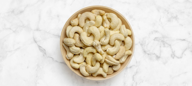

In [ ]:
img = PILImage.create(f'cashew.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

{'raw Almonds': 0.2799706757068634,
 'raw Walnuts': 9.708316792966798e-05,
 'raw Cashew nut': 0.0035760896280407906,
 'raw Pecans': 0.0012012335937470198,
 'raw Peanut': 2.8914313588757068e-05,
 'raw Pili nut': 0.005082771647721529,
 'raw Pistachios nut': 0.0018579182215034962,
 'raw Hazelnuts': 0.0003547525848262012,
 'raw Brazil nut': 0.00803409144282341,
 'raw Maccademia nut': 0.006531647872179747,
 'raw Pine nut': 0.0033805742859840393,
 'raw Chestnut': 0.008215798065066338,
 'raw Hickory nut': 0.0004940390354022384,
 'raw Ginkgo nut': 0.6811743974685669}

In [ ]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label(num_top_classes=5)
examples = [
    'almond1.jpg',
    'peanuts.jpg',
    'cashew.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share = True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2f0fbc961ed19de2eb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# https://huggingface.co/spaces/nasrin2023ripa/nut-recognizer